In [1]:
from metaflow import Flow
run = Flow('ClassifierTrainFlow').latest_run
run['start'].task.data.train_data

array([[1.369e+01, 3.260e+00, 2.540e+00, ..., 9.600e-01, 1.820e+00,
        6.800e+02],
       [1.269e+01, 1.530e+00, 2.260e+00, ..., 9.600e-01, 2.060e+00,
        4.950e+02],
       [1.162e+01, 1.990e+00, 2.280e+00, ..., 1.160e+00, 2.960e+00,
        3.450e+02],
       ...,
       [1.242e+01, 1.610e+00, 2.190e+00, ..., 1.060e+00, 2.960e+00,
        3.450e+02],
       [1.390e+01, 1.680e+00, 2.120e+00, ..., 9.100e-01, 3.330e+00,
        9.850e+02],
       [1.416e+01, 2.510e+00, 2.480e+00, ..., 6.200e-01, 1.710e+00,
        6.600e+02]])

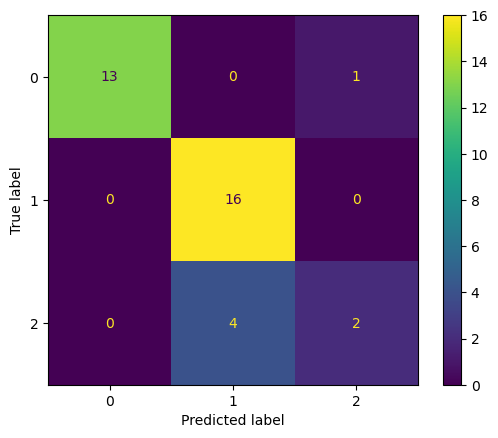

In [1]:
from metaflow import Flow
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

run = Flow('ClassifierTrainFlow').latest_run
run

model, score = run.data.results[0]
test_data = run['start'].task.data.test_data
test_labels = run['start'].task.data.test_labels

predictions = model.predict(test_data)
cm = confusion_matrix(test_labels, predictions, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()